# Hensikt

Her skal vi se om antagelser av hvordan slim oppfører seg på mikroskopisk nivå, kan gjenskaper bilder av slim tatt med mikroskop.

I tillegg er det verdt å nevne at moderngl (en "moderne" utgave av opengl for python) var fullstendig nytt for meg da jeg starta prosjektet. Og derfor er koden inni texture.py svært dårlig, så vær så snill å ikke mobbe meg for det. I tillegg vil du finne andre test-prosjekter som jeg brukte til å lære meg viktige konsepter innen opengl.

# Teori

Slim på mikroskopisk nivå ser ikke ut som det man vanligvis assosierer med slim. Det er nemlig et ganske primitivt skapning som sprer seg utover et areal, finner næringsstoffer, og gjør seg større. Så for å skape en modell for slim, her er noen antagelser av hvordan slim oppfører seg på mikriskopsik nivå

### Antagelse 1

Slimpartiklene (i texture.py, "agents") etterlater seg spor.


### Antagelse 2

Disse sporene blir diffusert. Altså, sporene i seg selv sprer seg over arealet rundt seg.

### Antagelse 3

Sporene forsvinner gradvis og linært.

### Antagelse 4

Alle slimpartiklene beveger seg med en konstant hastighet, i en retning (en vinkel) som den kan bestemme selv.

### Antagelse 5

Hvert slimpartikkel beveger seg mot sporene. Dette gjør de ved å se på hvor mye spor det er
- foran dem
- til høyre for dem
- til venstre for dem

Dersom det er mest spor foran, vil den ikke endre retning.
Dersom det er mer spor til venstre og til høyre, enn det er foran den, vil den endre retning på et tilfeldig vis.
Dersom det er mer spor til høyre enn til venstre, vil den endre retning mot høyre.
Dersom det er mer spor til venstre enn til høyre, vil den endre retning mot venstre.

### "Antagelse" 6

Det er ganske mange slimpartikler

# Om koden

siden jeg hadde store vansker med å forstå moderngl, og det ikke er intuitivt i det hele tatt, tenker jeg at det ikke har noe særlig hensikt å analysere koden. Jeg skal derfor heller forklare noen skjenerelle løsninger jeg kom fram til for å implementere antagelsene mine over.

Hvert slimpartikkel modifiserer en tekstur. Det vil si at pikselen på hvert slimpartikelen sin posisjon får hvit farge. I tilegg modifiserer jeg hver piksel til et "interpelated" verdi mellom seg selv og gjenomsnittet av nabopikslene hvert "frame" for å implementere anagelse 2. For å implementere antagelse 3, bare subtraherer jeg en liten verdi fra hver piksel for vært frame. For å implementere antagelse 5, så jeg på hvor mye slimspor et var i et 3x3 område foran hvert partikkel, i tillegg til et område til høyre og til venstre for partikkelen. Og når du skal kjøre koden, ser du at du kan justere "sensor_vinkel_mellomrom" som sier hvor mange radianer høyre og venstre er i forhold til rett fram. Og "sensor_distanse" er hvor langt foran partikkelen "ser".

# Resultater

## Installer moderngl

In [ ]:
!pip install moderngl

## Kjør koden

In [1]:
from texture import Texture

import sys

sys.argv = ['python']

Texture.fart = 1.0
Texture.rotasjons_fart = 1.0
Texture.sensor_vinkel_mellomrom = 0.2
Texture.sensor_distanse = 3.0

Texture.run()

2021-05-30 11:52:03,666 - moderngl_window - INFO - Attempting to load window class: moderngl_window.context.pyglet.Window
2021-05-30 11:52:04,483 - moderngl_window.context.base.window - INFO - Context Version:
2021-05-30 11:52:04,484 - moderngl_window.context.base.window - INFO - ModernGL: 5.6.4
2021-05-30 11:52:04,487 - moderngl_window.context.base.window - INFO - vendor: Intel Inc.
2021-05-30 11:52:04,488 - moderngl_window.context.base.window - INFO - renderer: Intel(R) HD Graphics 6000
2021-05-30 11:52:04,489 - moderngl_window.context.base.window - INFO - version: 4.1 INTEL-14.6.18
2021-05-30 11:52:04,492 - moderngl_window.context.base.window - INFO - python: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
2021-05-30 11:52:04,493 - moderngl_window.context.base.window - INFO - platform: darwin
2021-05-30 11:52:04,496 - moderngl_window.context.base.window - INFO - code: 410
2021-05-30 11:52:04,499 - moderngl_window.context.base.window - WARNING - glerror consumed after getting

## Genererte bilder

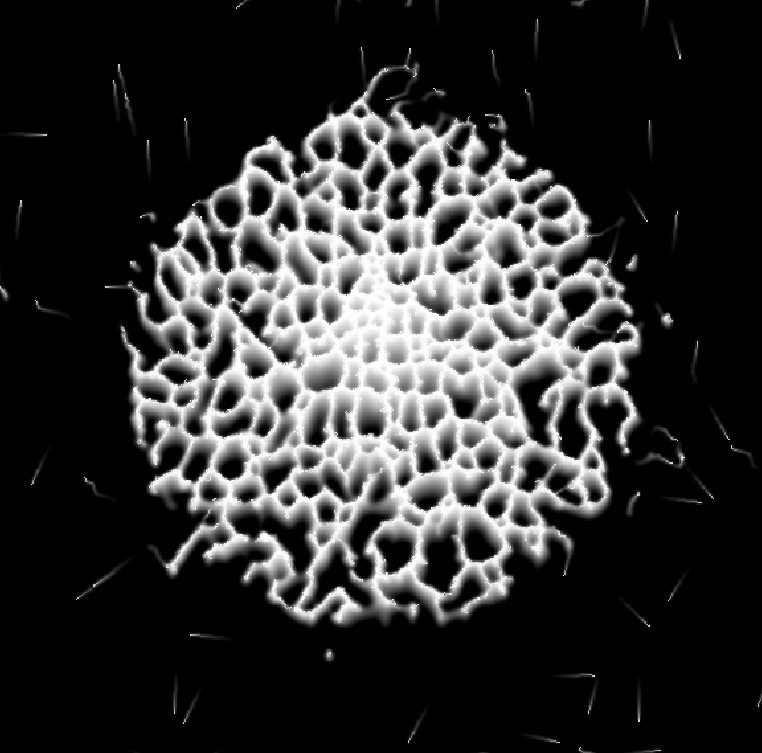

## Faktisk slim under mikroskop

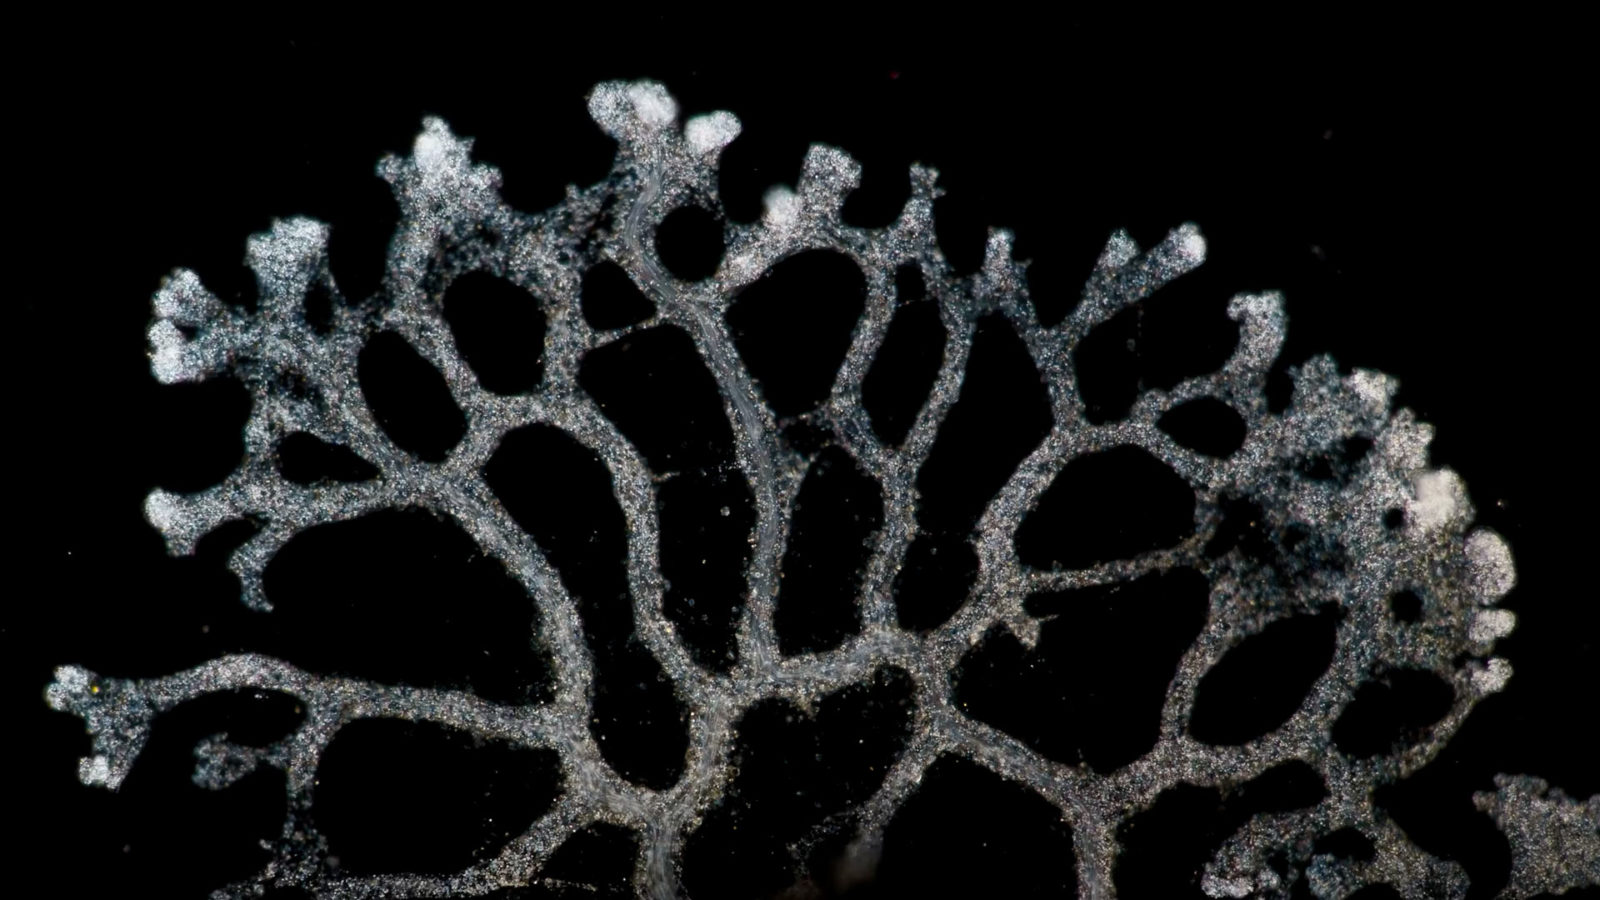

# Diskusjon

Dersom man sammenligner ekte slim med det genererte slimet, ser man at de ligner svært mye, som viser til hvor simpelt slim faktik er.

Men det er fremdeles visse egenskaper som slim har, som min modell ikke tar i betraktning. Som for eksempel at slim sit mål er å finne og spise næringsstoffer. Dette gjør den ved å utforske omgivelsene (som min modell allerede gjør), og desom en del av slimet finner noe, vil den sende et signal til resten av slimet. Da vil den gi opp deler av seg selv for å fokusere fullt og helt på å få i seg næringsstoffene.

# Konklusjon

Her har jeg laget en modell om hvordan slim oppfører seg på mikroskopisk nivå. Modellen er validert ved å sammenligne dens genererte bilder med reelle bilder av slim, tatt med mikroskop.

Men vi kan fremdeles utvide modellen for å innføre slimens evne til å få tak i mat